# Predicting Car Entry Price From Craiglist Used Car Dataset

# Import Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_raw = pd.read_csv (r'/Users/ferguswilliams/Downloads/train.csv')

# Data Exploration and Cleaning

In [2]:
df_raw

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Immediately there are a number of columns that would seem to have little effect on car price. These can be droppped from the dataframe.

In [3]:
#we can immediately remove columns that are unsuitable for use as features
df_raw= df_raw.drop(columns=["id","url","description","image_url","posting_date","VIN","region_url"])

At this point it would be useful to look at the extremes of entry price to see if they are realistic.

In [4]:
#lets look at extreme values for entry price
min(df_raw.price),max(df_raw.price)

(0, 3736928711)

Clearly these values are unrealistic, it would be beneficial to remove price outliers from the data to improve model performance.

In [5]:
#remove outliers outwith the 5th to 95th percentile
df=df_raw[df_raw.price<df_raw.price.quantile(0.95)]
df=df[df.price>df.price.quantile(0.05)]
df=df[df.price>0]

We can now look at rows containing missing data and make an assesment of which features are suitable for use.

In [6]:
# we can look at the percentage of missing data in columns 
percent_missing = (df.isnull().sum()/len(df))*100
percent_missing

region            0.000000
price             0.000000
year              0.195366
manufacturer      3.888802
model             1.109668
condition        37.186623
cylinders        40.266052
fuel              0.649968
odometer          0.570801
title_status      1.966273
transmission      0.454870
drive            30.842060
size             71.216260
type             21.771497
paint_color      29.625853
county          100.000000
state             0.000000
lat               0.908666
long              0.908666
dtype: float64

Some columns have a significant amount of missing data, we will not consider columns with more than 25% missing values for use as features.

In [7]:
#remove columns containing 30% mising values
df=df.dropna(thresh=len(df)*0.75,axis=1)
df

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


12 features are left for use in the model. We can first look at plotting price against the numerical features (odometer, year, lat, long), to see if any obvious trends make them suitable for use in the model.

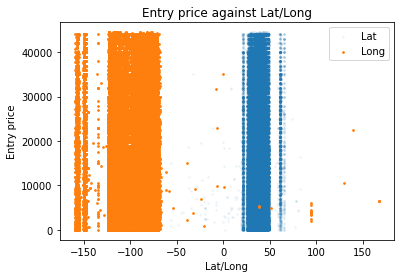

In [8]:
#plot price against lat/long
plt.scatter(df.lat,df.price,s=3,alpha=0.05,label="Lat")
plt.xlabel("Lat/Long")
plt.ylabel("Entry price")
plt.title("Entry price against Lat/Long")
plt.scatter(df.long,df.price,s=3, label="Long")
plt.legend()

There doesnt seem to be any clear trend between entry price and latitude/longitude. This would suggest location isnt particularly important in determining car price. We will not consider lat,long, region and state for use as features, since these features represent location and other characteristics specific to the car are expected to be more important.

Text(0.5, 1.0, 'Entry price against Year')

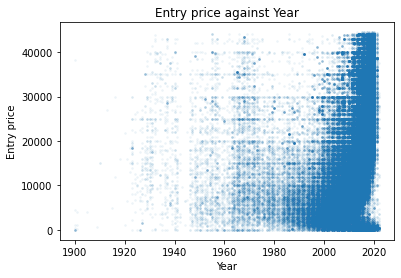

In [9]:
#plot price against year
df=df.drop(columns=["lat","long","region","state"])
plt.scatter(df.year,df.price,alpha=0.05,s=3)
plt.xlabel("Year")
plt.ylabel("Entry price")
plt.title("Entry price against Year")

Intuitively one would expect newer cars to be more expensive, since cars generally depreciate in value over time. This is the general trend observed after roughly 1980. If the proportion of cars older than 1980 is small, it would be appopriate to remove them from the data to improve model performance. 

In [10]:
#proportion of cars older than 1980
len(df[df["year"]<1980])/len(df)

0.020440968886360343

Since the proportion of cars  older than 1980 is small, we can treat them as outliers and remove from the data.

Text(0.5, 1.0, 'Entry price against Year')

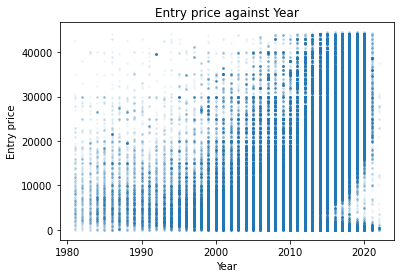

In [11]:
#removing cars older than 1980 and plotting
df= df[df.year>1980]
plt.scatter(df.year,df.price,alpha=0.05,s=3)
plt.xlabel("Year")
plt.ylabel("Entry price")
plt.title("Entry price against Year")

This now gives a reasonable trend towards increasing prices, as such year seems a suitable feature for use in the model.

Text(0.5, 1.0, 'Entry price against Odometer')

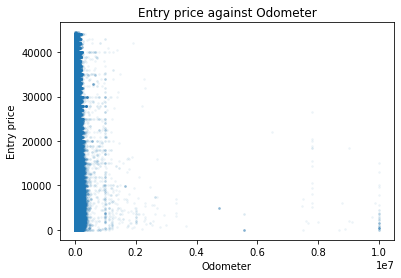

In [12]:
#look at the effect of odometer on entry price
plt.scatter(df.odometer,df.price,alpha=0.05,s=3)
plt.xlabel("Odometer")
plt.ylabel("Entry price")
plt.title("Entry price against Odometer")

Some datapoints have uncommonly high odometer values which could negatively affect model performance. Any cars with mileage greater than 400,000 are considered outliers and removed from the data.

Text(0.5, 1.0, 'Entry price against Odometer')

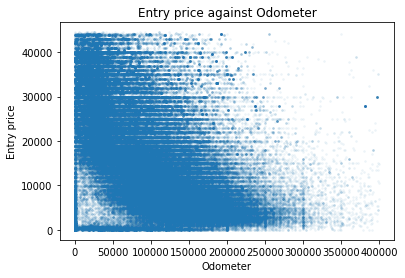

In [13]:
#removing odometer outliers and plotting
df= df[df.odometer<400000]
plt.scatter(df.odometer,df.price,alpha=0.05,s=3)
plt.xlabel("Odometer")
plt.ylabel("Entry price")
plt.title("Entry price against Odometer")

Now a reasonable trend can be seen towards lower prices with increasing odometer, which is to be expected. This feature seems ideal for use in the model.

We can now explore the categorical features. At this point it would be useful to see the number of unique categories corresponding to each feature, as encoding a large number of categories in a column would be computationally intensive.

In [14]:
#form dataframe of categories and entry price
categories=df.drop(columns=["odometer","year",])
#find number of  classes in each column
for col in categories:
    print(col,len(categories[col].unique()))

price 13170
manufacturer 43
model 24229
fuel 6
title_status 7
transmission 4
type 14


The model column contains 24229 unique categories, this would be very computationally intensive to encode and feed into the model. So car model will not be considered for use as a feature. 

With the remaining categorical features, we can look at the the mean prices corresponding to the categories for each feature.

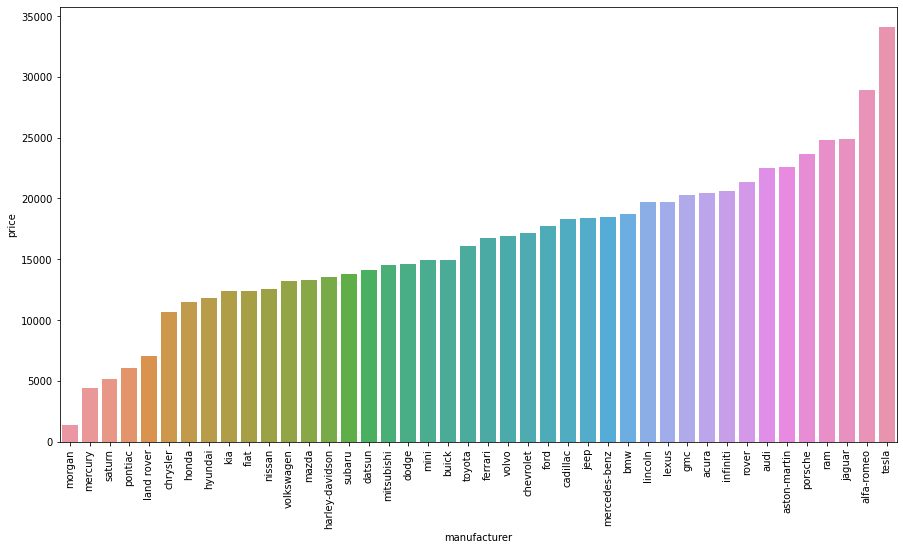

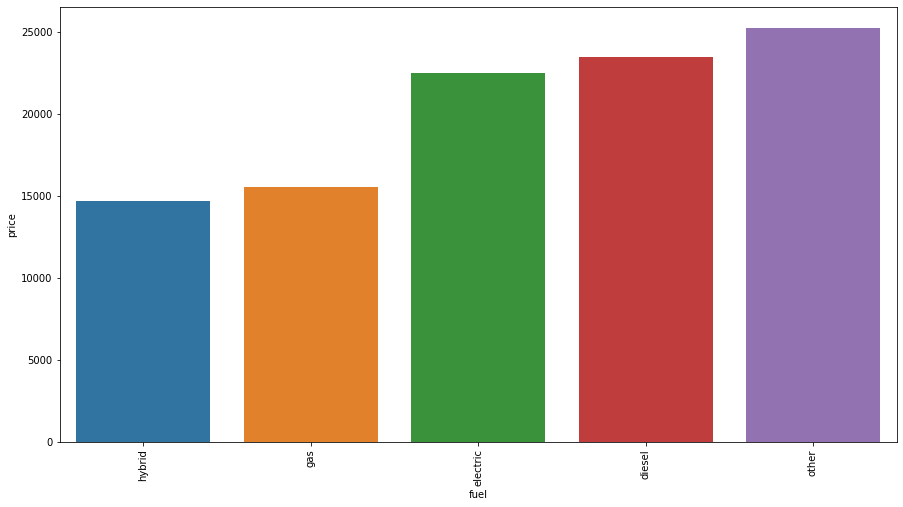

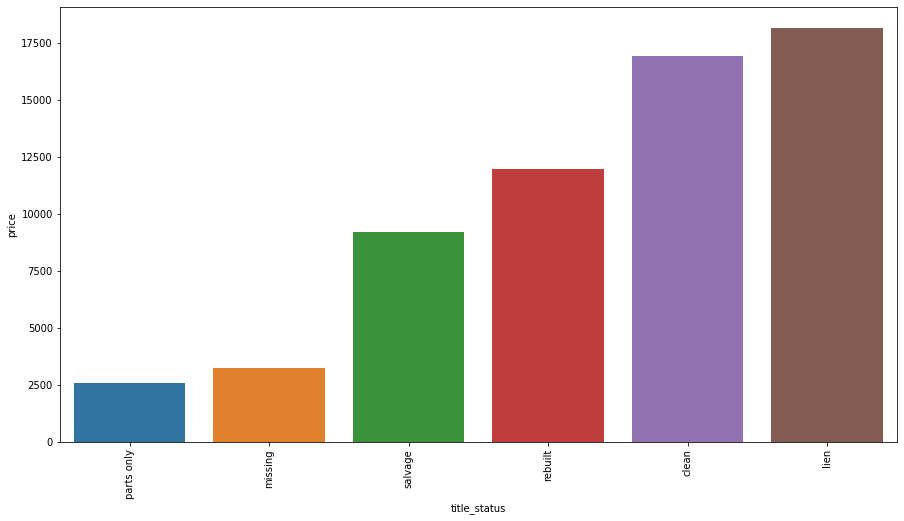

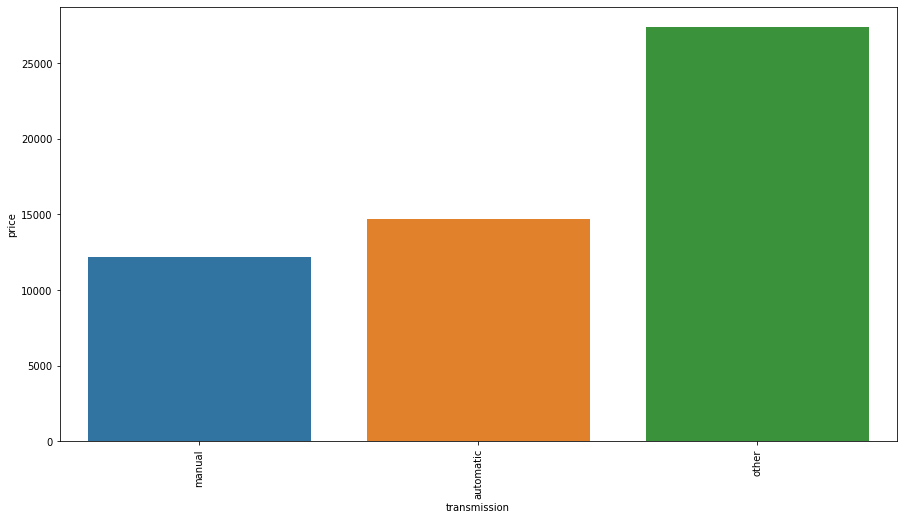

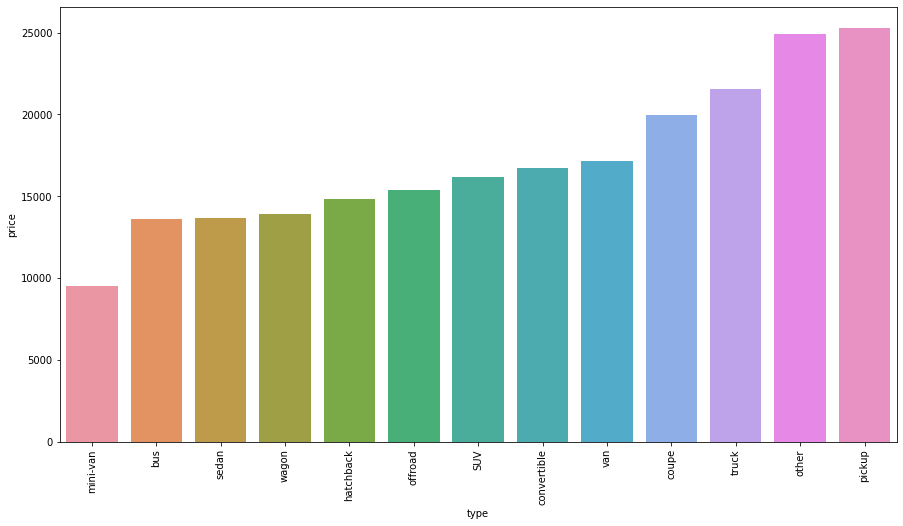

In [15]:
df=df.drop(columns="model")
import seaborn as sns
categories=categories.drop(columns="model")
cat=categories.drop(columns="price")
for col in cat.columns:
    cat_plot = categories.groupby(by=col).mean().reset_index().sort_values(by="price")
    plt.figure(figsize = (15,8))
    ax = sns.barplot(x=col, y="price", data=cat_plot)
    tick = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()

The plot of manufacturer shows significant variation in mean price. Manufacturers typically considered more expensive are near to the top of the scale, whilst more affordable manufacturers are close to the bottom. This would suggest manufacturer is an important factor in determining price, and is an ideal choice for use as a feature.

Fuel type shows the least variation in mean price of all plots, so this feature will not be considered.

Title status shows considerable variation in mean price with "parts only" and  "missing" significantly lower than "salvage", "rebuilt", "clean" and "lien". We can take a look at the proportion of data corresponding to "parts only" and "missing" to see if they are suitable for removal as outliers.

In [16]:
#drop fuel from dataframe
df=df.drop(columns="fuel")
df["title_status"].value_counts()/len(df)

clean         0.946661
rebuilt       0.018974
salvage       0.010325
lien          0.003494
missing       0.001045
parts only    0.000371
Name: title_status, dtype: float64

Since missing and parts only make up a very small proportion of the dataset we can remove them. Now the remaining categories in title_status show less variation in mean price than other plots, so this feature will not be chosen.

In [17]:
df=df[df["title_status"]!="missing"]
df=df[df["title_status"]!="parts only"]
df=df.drop(columns="title_status")

Transmission and car type are left to be considered. Both show significant variation between different categories. It could be beneficial to run a small machine learning model on a small sample of the data using these variables to gain a measure of the importance of these features.


In [18]:
from sklearn.ensemble import RandomForestRegressor
#take 10% sample of data
df_samp=df.sample(frac=0.1,random_state=3300)
#use other features already specified for model
feat=df_samp.drop(columns="price")
#one-hot encode categorical features, this forms a new column for each category and assigns a 0 or 1 value.
feat_enc=pd.get_dummies(feat)
price=df_samp.price
rand_imp=RandomForestRegressor(random_state=3300)
rand_imp.fit(feat_enc,price)

RandomForestRegressor(random_state=3300)

In [19]:
# find feature importance scores
manufscore=0
yearscore=0
typescore=0
transmissionscore=0
odometerscore=0
for name, score in zip(feat, rand_imp.feature_importances_ ):
    if name[0:5]=='manuf':
        manufscore=manufscore+score
    elif name[0:4]=="year":
        yearscore=yearscore+score        
    elif name[0:8]=='odometer':
        odometerscore=odometerscore+score
    elif name [0:4]=='type':
        typescore=typescore+score
    elif name [0:12]=='transmission':
        transmissionscore=transmissionscore+score
    else:
        print (name, score )
        
print('manufacturer: ',manufscore)
print('odometerscore: ',odometerscore)
print('transmissionscore:',transmissionscore)
print("typescore:",typescore)
print("yearscore:",yearscore)


manufacturer:  0.2562908047781311
odometerscore:  0.0017527001753015773
transmissionscore: 0.0007762325903348495
typescore: 7.86744827370337e-05
yearscore: 0.4219104665608892


So the feature importance score for car type is larger than for transmission, so we will select type for use in the model.

In [20]:
df=df.drop(columns="transmission")

Now the four features year , odometer, manufacturer and car type have been selected. We can prepare the remaining data for training and testing the model.

# Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#drop Nan values from data frame
dat=df.dropna()
#One-hot encode the manufacturer and type data 
data = pd.get_dummies(dat)
#split the data into a training and test set
data_train,data_test=train_test_split(data,test_size=0.2,random_state=3300)

A 10% subset of the data will be taken and the number of estimators required to prevent underfitting will be found.

Text(0.5, 1.0, 'Mean Absolute Error against Number of Estimators')

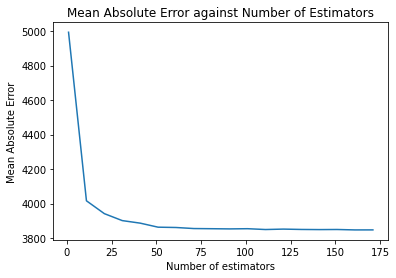

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#drop Nan values from data frame
dat=df.dropna()
#One-hot encode the manufacturer and type data 
data = pd.get_dummies(dat)
#split the data into a training and test set
data_train,data_test=train_test_split(data,test_size=0.2,random_state=3300)
#take sample of training data since following code is computationally intensive
data_samp=data_train.sample(frac=0.1,random_state=3300)
#futher split into sample training and validation datsets
data_samp_train,data_samp_test=train_test_split(data_samp,test_size=0.2,random_state=3300)
#look to investigate the number of estimators required to minimise the generalisation error
X_samp_train=data_samp_train.drop(columns="price")
X_samp_test=data_samp_test.drop(columns="price")
y_samp_train=data_samp_train.price
y_samp_test=data_samp_test.price
n_est=[]
error=[]
for i in range(1,180,10):
    rand_f = RandomForestRegressor(n_estimators=i, random_state=3300)
    rand_f.fit(X_samp_train, y_samp_train)
    y_samp_pred=rand_f.predict(X_samp_test) 
    n_est.append(i)
    error.append(np.mean(abs(y_samp_pred - y_samp_test)))
plt.plot(n_est,error)
plt.xlabel("Number of estimators")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error against Number of Estimators")

The generalisation error is seen to drop sharply and plateau as expected, we will now train the Random Forest using the full the dataset and 150 estimators.

In [23]:
#redefine features and target using full datatset
X_train=data_train.drop(columns="price")
y_train=data_train.price
X_test=data_test.drop(columns="price")
y_test=data_test.price
#train Random Forest
rand_f = RandomForestRegressor(n_estimators=150, random_state=3300)
rand_f.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=3300)

Now that the model is trained, we can look to measure its performance.

# Measuring Model Performance

Text(0, 0.5, 'Actual Entry Price')

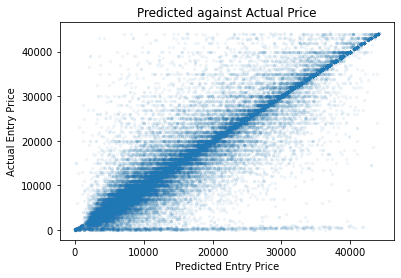

In [24]:
#generate model predictions on test set and plot against actual data
y_pred=rand_f.predict(X_test)
plt.scatter(y_pred,y_test, 5, alpha=0.05)
plt.title("Predicted against Actual Price")
plt.xlabel("Predicted Entry Price")
plt.ylabel("Actual Entry Price")

For a perfect model we would expect a straight line of gradient 1. Here the data is fairly spread around the line y=x so, at best the model performs reasonably well. Of particular interest is the series of data close to the predicted entry price axes where the actual value is much less than predicted. The model may underperform in this region since it does not take account factors such as the condition of the car which could significantly reduce actual price.

We can take a look at the mean absolute error and RMSE of the test set, as a measure of the models performance.

In [25]:
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error: " ,np.mean(abs(y_test - y_pred)),",", "Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  2206.5080714097157 , Root Mean Squared Error:  4545.215624504159


This mean absolute error and RMSE for the model do not seem particularly large, suggesting the model seems reasonable. However comparison is needed with other models to gauge relative performance.
We can look at the spread of the price distribution and compare to the performance measures.

In [26]:
dat.price.std()

11436.926925532149

The standard deviation of entry price is significantly larger than mean absolute error and mean squared error, which gives an indication that the errors are not unreasonable.